In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from copy import deepcopy

In [ ]:
file_names = os.listdir("../data/bulk_export/")  # TODO update with proper dir once git is mounted to colab
print(file_names)

['funding_rounds.csv', 'category_groups.csv', 'people_descriptions.csv', 'investors.csv', 'people.csv', 'investment_partners.csv', 'checksum.csv', 'organization_descriptions.csv', 'jobs.csv', 'org_parents.csv', 'event_appearances.csv', 'organizations.csv', 'events.csv', 'funds.csv', 'degrees.csv', 'ipos.csv', 'investments.csv', 'acquisitions.csv']


In [ ]:
df_names = [x[:-4] for x in file_names]
print(df_names)

['funding_rounds', 'category_groups', 'people_descriptions', 'investors', 'people', 'investment_partners', 'checksum', 'organization_descriptions', 'jobs', 'org_parents', 'event_appearances', 'organizations', 'events', 'funds', 'degrees', 'ipos', 'investments', 'acquisitions']


In [ ]:
dfs = [pd.read_csv("../data/bulk_export/"+x) for x in file_names]
df_dict = dict(zip(df_names, dfs))
print(df_dict.keys())

dict_keys(['funding_rounds', 'category_groups', 'people_descriptions', 'investors', 'people', 'investment_partners', 'checksum', 'organization_descriptions', 'jobs', 'org_parents', 'event_appearances', 'organizations', 'events', 'funds', 'degrees', 'ipos', 'investments', 'acquisitions'])


## Look at key dfs

In [ ]:
df_dict["funding_rounds"].head()

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,country_code,state_code,...,raised_amount_usd,raised_amount,raised_amount_currency_code,post_money_valuation_usd,post_money_valuation,post_money_valuation_currency_code,investor_count,org_uuid,org_name,lead_investor_uuids
0,8a945939-18e0-cc9d-27b9-bf33817b2818,Angel Round - Facebook,funding_round,facebook-angel--8a945939,https://www.crunchbase.com/funding_round/faceb...,143236.0,2007-05-27 06:08:18,2018-02-12 23:05:39,USA,CA,...,500000.0,500000.0,USD,NaN,NaN,USD,4.0,df662812-7f97-0b43-9d3e-12f64f504fbb,Facebook,3f47be49-2e32-8118-01a0-31685a4d0fd7
1,d950d7a5-79ff-fb93-ca87-13386b0e2feb,Series A - Facebook,funding_round,facebook-series-a--d950d7a5,https://www.crunchbase.com/funding_round/faceb...,145939.0,2007-05-27 06:09:10,2018-02-12 23:52:16,USA,CA,...,12700000.0,12700000.0,USD,98000000.0,98000000.0,USD,4.0,df662812-7f97-0b43-9d3e-12f64f504fbb,Facebook,b08efc27-da40-505a-6f9d-c9e14247bf36
2,6fae3958-a001-27c0-fb7e-666266aedd78,Series B - Facebook,funding_round,facebook-series-b--6fae3958,https://www.crunchbase.com/funding_round/faceb...,273250.0,2007-05-27 06:09:36,2018-02-12 23:30:46,USA,CA,...,27500000.0,27500000.0,USD,502500000.0,502500000.0,USD,5.0,df662812-7f97-0b43-9d3e-12f64f504fbb,Facebook,"e2006571-6b7a-e477-002a-f7014f48a7e3,8d5c7e48-..."
3,bcd5a63d-ed99-6963-0dd2-e36f6582f846,Series B - Photobucket,funding_round,photobucket-series-b--bcd5a63d,https://www.crunchbase.com/funding_round/photo...,149479.0,2007-05-29 11:05:59,2018-02-12 23:27:36,USA,CO,...,10500000.0,10500000.0,USD,NaN,NaN,USD,2.0,f53cb4de-236e-0b1b-dee8-7104a8b018f9,Photobucket,NaN
4,60e6afd9-1215-465a-dd17-0ed600d4e29b,Series A - Geni,funding_round,geni-series-a--60e6afd9,https://www.crunchbase.com/funding_round/geni-...,313010.0,2007-05-31 20:19:28,2018-02-12 23:41:29,USA,CA,...,NaN,NaN,NaN,10000000.0,10000000.0,USD,1.0,4111dc8b-c0df-2d24-ed33-30cd137b3098,Geni,fb2f8884-ec07-895a-48d7-d9a9d4d7175c


In [ ]:
df_dict["organizations"].head()

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,legal_name,roles,...,phone,facebook_url,linkedin_url,twitter_url,logo_url,alias1,alias2,alias3,primary_role,num_exits
0,e1393508-30ea-8a36-3f96-dd3226033abd,Wetpaint,organization,wetpaint,https://www.crunchbase.com/organization/wetpaint,123607.0,2007-05-25 13:51:27,2019-06-24 22:19:25,NaN,company,...,206-859-6300,https://www.facebook.com/Wetpaint,https://www.linkedin.com/company/wetpaint,https://twitter.com/wetpainttv,https://crunchbase-production-res.cloudinary.c...,NaN,NaN,NaN,company,NaN
1,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,organization,zoho,https://www.crunchbase.com/organization/zoho,8777.0,2007-05-26 02:30:28,2018-10-27 00:29:49,NaN,"investor,company",...,NaN,http://www.facebook.com/zoho,http://www.linkedin.com/company/zoho-corporati...,http://twitter.com/zoho,https://crunchbase-production-res.cloudinary.c...,NaN,NaN,NaN,company,1.0
2,5f2b40b8-d1b3-d323-d81a-b7a8e89553d0,Digg,organization,digg,https://www.crunchbase.com/organization/digg,11537.0,2007-05-26 03:03:23,2018-12-10 10:09:14,"Digg Holdings, LLC",company,...,877-342-7222,http://www.facebook.com/digg,http://www.linkedin.com/company/digg,http://twitter.com/digg,https://crunchbase-production-res.cloudinary.c...,NaN,NaN,NaN,company,NaN
3,f4d5ab44-058b-298b-ea81-380e6e9a8eec,Omidyar Network,organization,omidyar-network,https://www.crunchbase.com/organization/omidya...,6844.0,2007-05-26 03:21:34,2019-06-19 12:17:48,NaN,investor,...,650.482.2500,http://www.facebook.com/OmidyarNetwork,http://www.linkedin.com/company/22806,http://twitter.com/OmidyarNetwork,https://crunchbase-production-res.cloudinary.c...,NaN,NaN,NaN,investor,33.0
4,df662812-7f97-0b43-9d3e-12f64f504fbb,Facebook,organization,facebook,https://www.crunchbase.com/organization/facebook,15.0,2007-05-26 04:22:15,2020-03-30 18:33:35,"Facebook, Inc.","investor,company",...,NaN,https://www.facebook.com/facebook/,http://www.linkedin.com/company/facebook,https://twitter.com/facebook,https://crunchbase-production-res.cloudinary.c...,NaN,NaN,NaN,company,NaN


In [ ]:
df_dict["investments"].head()

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,funding_round_uuid,funding_round_name,investor_uuid,investor_name,investor_type,is_lead_investor
0,524986f0-3049-54a4-fa72-f60897a5e61d,Accel investment in Series A - Facebook,investment,accel-invested-in-facebook-series-a--d950d7a5-...,https://www.crunchbase.com/investment/accel-in...,NaN,2007-05-27 06:09:10,2018-02-13 00:52:57,d950d7a5-79ff-fb93-ca87-13386b0e2feb,Series A - Facebook,b08efc27-da40-505a-6f9d-c9e14247bf36,Accel,organization,True
1,6556ab92-6465-25aa-1ffc-7f8b4b09a476,Greylock investment in Series B - Facebook,investment,greylock-invested-in-facebook-series-b--6fae39...,https://www.crunchbase.com/investment/greylock...,NaN,2007-05-27 06:09:36,2018-02-13 00:53:20,6fae3958-a001-27c0-fb7e-666266aedd78,Series B - Facebook,e2006571-6b7a-e477-002a-f7014f48a7e3,Greylock,organization,True
2,0216e06a-61f8-9cf1-19ba-20811229c53e,Meritech Capital Partners investment in Series...,investment,meritech-capital-partners-invested-in-facebook...,https://www.crunchbase.com/investment/meritech...,NaN,2007-05-27 06:09:36,2019-03-27 19:50:32,6fae3958-a001-27c0-fb7e-666266aedd78,Series B - Facebook,8d5c7e48-82da-3025-dd46-346a31bab86f,Meritech Capital Partners,organization,True
3,dadd7d86-520d-5e35-3033-fc1d8792ab91,Trinity Ventures investment in Series B - Phot...,investment,trinity-ventures-invested-in-photobucket-serie...,https://www.crunchbase.com/investment/trinity-...,NaN,2007-05-29 11:05:59,2018-02-13 00:55:58,bcd5a63d-ed99-6963-0dd2-e36f6582f846,Series B - Photobucket,7ca12f7a-2f8e-48b4-a8d1-1a33a0e275b9,Trinity Ventures,organization,NaN
4,581c4b38-9653-7117-9bd4-7ffe5c7eba69,Founders Fund investment in Series A - Geni,investment,founders-fund-invested-in-geni-series-a--60e6a...,https://www.crunchbase.com/investment/founders...,NaN,2007-05-31 20:19:28,2018-02-13 00:53:04,60e6afd9-1215-465a-dd17-0ed600d4e29b,Series A - Geni,fb2f8884-ec07-895a-48d7-d9a9d4d7175c,Founders Fund,organization,True


In [ ]:
df_dict["ipos"].head()

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,org_uuid,org_name,...,went_public_on,share_price_usd,share_price,share_price_currency_code,valuation_price_usd,valuation_price,valuation_price_currency_code,money_raised_usd,money_raised,money_raised_currency_code
0,72d30ebd-53ef-2486-6c29-22785c5173ce,NaN,ipo,microsoft-ipo--72d30ebd,https://www.crunchbase.com/ipo/microsoft-ipo--...,25596.0,2008-02-09 05:25:18,2018-02-12 23:11:05,fd80725f-53fc-7009-9878-aeecf1e9ffbb,Microsoft,...,1986-03-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3ad2b068-2d97-f646-0b80-1e5f3d7adfc4,NaN,ipo,the-walt-disney-company-ipo--3ad2b068,https://www.crunchbase.com/ipo/the-walt-disney...,16304.0,2008-02-09 05:40:32,2019-02-25 22:31:49,756936c0-c335-f0ae-0a3d-fe26bdff5695,The Walt Disney Company,...,1978-01-13,NaN,NaN,NaN,NaN,NaN,NaN,300000000.0,300000000.0,USD
2,a265c6f6-4b96-4079-096a-967a37f3da2b,NaN,ipo,divx-ipo--a265c6f6,https://www.crunchbase.com/ipo/divx-ipo--a265c6f6,28253.0,2008-02-25 23:52:11,2018-02-12 23:57:54,73296f0d-85a5-78d5-90b3-86c5f8981ba9,DivX,...,2006-10-22,16.0,16.0,USD,160000000.0,160000000.0,USD,145000000.0,145000000.0,USD
3,e1a1c4e8-f163-ab0f-e171-f6c1cc8c2269,NaN,ipo,opera-software-ipo--e1a1c4e8,https://www.crunchbase.com/ipo/opera-software-...,19171.0,2008-02-27 20:22:31,2018-08-13 10:41:47,6cf8be18-936c-ddd5-5e31-d2953f1e6ef0,Opera Software,...,2004-02-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ee426509-826e-5dd0-9309-e79c8f384904,NaN,ipo,xo-group-ipo--ee426509,https://www.crunchbase.com/ipo/xo-group-ipo--e...,29634.0,2008-02-29 00:31:34,2018-02-12 23:41:42,ff8439cf-097c-a88a-9bb9-dd83d23aa14b,"XO Group, Inc.",...,1999-12-02,NaN,NaN,NaN,NaN,NaN,NaN,35000000.0,35000000.0,USD


In [ ]:
df_dict["acquisitions"].head()

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,acquiree_uuid,acquiree_name,...,acquirer_cb_url,acquirer_country_code,acquirer_state_code,acquirer_region,acquirer_city,acquisition_type,acquired_on,price_usd,price,price_currency_code
0,c62807f2-3487-f63b-e7fc-559b752ed44c,Flektor acquired by Fox Interactive Media,acquisition,fox-interactive-media-acquires-flektor--c62807f2,https://www.crunchbase.com/acquisition/fox-int...,98397.0,2007-05-31 22:19:54,2018-02-13 00:09:05,180ebf67-68d0-2316-e93d-8e1e546330ba,Flektor,...,https://www.crunchbase.com/organization/fox-in...,USA,CA,California,Beverly Hills,NaN,2007-05-30,NaN,NaN,NaN
1,419cabe1-4d71-5f64-3e9b-c9d0fb445cca,GrandCentral acquired by Google,acquisition,google-acquires-grandcentral--419cabe1,https://www.crunchbase.com/acquisition/google-...,57183.0,2007-07-03 08:14:50,2018-02-12 22:14:26,5b05e013-a448-3a0b-d872-a6ae668e1192,GrandCentral,...,https://www.crunchbase.com/organization/google,USA,CA,California,Mountain View,NaN,2007-07-01,60000000.0,60000000.0,USD
2,01bd2058-ccf8-6102-f253-9224a67a592b,Last.fm acquired by CBS,acquisition,cbs-acquires-last-fm--01bd2058,https://www.crunchbase.com/acquisition/cbs-acq...,64713.0,2007-07-12 04:19:24,2018-02-12 23:41:20,8249dffa-1ca6-6f99-9f76-d56c83f85f2d,Last.fm,...,https://www.crunchbase.com/organization/cbs,USA,NY,New York,New York,NaN,2007-05-01,280000000.0,280000000.0,USD
3,831becd6-e913-b9f5-ac09-2bff915f9453,Kosiso - store acquired by Google,acquisition,google-acquires-feedburner--831becd6,https://www.crunchbase.com/acquisition/google-...,76446.0,2007-07-13 09:52:59,2018-02-12 23:43:38,10dd03fa-69ff-3a82-6321-c6b16c9a9f41,Kosiso - store,...,https://www.crunchbase.com/organization/google,USA,CA,California,Mountain View,acquisition,2007-05-23,100000000.0,100000000.0,USD
4,9da90ee7-aad7-e0b4-8456-839363032e5e,Recipezaar acquired by Scripps Networks,acquisition,scripps-networks-interactive-acquires-recipeza...,https://www.crunchbase.com/acquisition/scripps...,54604.0,2007-07-20 05:29:07,2018-02-12 23:51:07,0af10345-613d-e144-f8bd-b62e288985a0,Recipezaar,...,https://www.crunchbase.com/organization/scripp...,USA,TN,Tennessee,Knoxville,NaN,2007-07-01,NaN,NaN,NaN


In [ ]:
df_dict["category_groups"].head()

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,category_groups_list
0,f9b14a15-5517-8f38-0562-729ebb54dfdb,Homeless Shelter,category,homeless-shelter,https://www.crunchbase.com/category/homeless-s...,NaN,2014-04-20 07:58:46,2018-02-13 00:59:11,NaN
1,f8320fcf-b657-37d2-1495-daa3ad888ece,Freemium,category,freemium,https://www.crunchbase.com/category/freemium,NaN,2014-04-20 07:58:46,2018-02-13 00:59:11,NaN
2,f0193199-a968-b457-eb49-95344e22a5ce,Industrial,category,industrial,https://www.crunchbase.com/category/industrial,NaN,2014-04-20 07:58:46,2018-02-13 00:59:11,NaN
3,ed8217ff-bd11-26fe-d82e-eb98a276dc2e,Innovation Management,category,innovation-management,https://www.crunchbase.com/category/innovation...,NaN,2014-04-20 07:58:46,2018-02-13 00:59:11,NaN
4,e9794581-9547-2150-8185-7b747f5c9913,Lighting,category,lighting,https://www.crunchbase.com/category/lighting,NaN,2014-04-20 07:58:46,2018-02-13 00:59:11,Hardware


In [ ]:
df_dict["events"].head()

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,short_description,started_on,...,event_url,registration_url,venue_name,description,country_code,state_code,region,city,logo_url,event_roles
0,6a21f93a-3cae-02ac-44c7-c166c0ed50fa,SF New Tech,event,sfnt-201272-san-francisco,https://www.crunchbase.com/event/sfnt-201272-s...,20925.0,2014-10-03 18:12:25,2018-02-13 01:14:28,"Join us on Wed, Oct 15th for another edition o...",2014-10-14,...,NaN,http://1015sfnt-meetup.eventbrite.com,RocketStudios,NaN,USA,CA,California,San Francisco,https://crunchbase-production-res.cloudinary.c...,conference
1,135a927a-b238-037e-50e2-d3a2e3511ed2,Adobe MAX 2014,event,adobe-max-2014104-los-angeles,https://www.crunchbase.com/event/adobe-max-201...,15706.0,2014-10-03 18:14:15,2018-02-13 01:14:24,"Sessions, labs, and creativity workshops where...",2014-10-04,...,NaN,http://max.adobe.com/registration/,Los Angeles Convention Center,NaN,USA,CA,California,Los Angeles,https://crunchbase-production-res.cloudinary.c...,conference
2,c6006d9f-e796-2a2a-2efc-c4e55caa98f8,ad:tech New York,event,ad-tech-new-york-2014105-new-york,https://www.crunchbase.com/event/ad-tech-new-y...,17213.0,2014-10-03 18:40:03,2018-02-13 01:14:23,ad:tech New York will showcase keynote speaker...,2014-10-05,...,NaN,http://ad-tech.com/ny/registration,Javits Center,NaN,USA,NY,New York,New York,https://crunchbase-production-res.cloudinary.c...,conference
3,2710319a-f022-5cd3-f855-6594fd0d6db3,Engadget Expand,event,engadget-expand-2014107-new-york,https://www.crunchbase.com/event/engadget-expa...,8153.0,2014-10-03 18:51:28,2018-02-13 01:14:21,Engadget Expand is designed from the ground up...,2014-11-07,...,NaN,http://www.eventbrite.com/e/engadget-expand-ny...,Javits Center,"It’s a free, 10,000+ attendee event that give...",USA,NY,New York,New York,https://crunchbase-production-res.cloudinary.c...,"conference,expo"
4,35e61ac8-58bf-0492-8285-39dc9c2b236d,Dreamforce 2014,event,dreamforce-20141013-san-francisco,https://www.crunchbase.com/event/dreamforce-20...,4416.0,2014-10-03 19:05:07,2018-06-22 04:56:39,Dreamforce is your chance to learn from indust...,2014-10-13,...,https://www.montypythonlive.com/best-led-grow-...,http://www.salesforce.com/dreamforce/DF14/regi...,Moscone Center,NaN,USA,CA,California,San Francisco,https://crunchbase-production-res.cloudinary.c...,conference


## Start poking around a bit with specific companies

In [ ]:
company_id = 'df662812-7f97-0b43-9d3e-12f64f504fbb'  # Facebook

In [ ]:
df_dict["funding_rounds"][df_dict["funding_rounds"]["org_uuid"]==company_id][[
    'announced_on', 'raised_amount_usd', 'post_money_valuation_usd']].head()

,announced_on,raised_amount_usd,post_money_valuation_usd
0,2004-09-01,500000.0,NaN
1,2005-05-01,12700000.0,9.800000e+07
2,2006-04-01,27500000.0,5.025000e+08
588,2007-10-24,240000000.0,1.500000e+10
1574,2007-11-30,60000000.0,NaN


In [ ]:
df_dict["acquisitions"][df_dict["acquisitions"]['acquirer_uuid']==company_id][[
    'acquiree_name', 'acquisition_type', 'acquired_on', 'price_usd']].head()

,acquiree_name,acquisition_type,acquired_on,price_usd
6,Parakey,NaN,2007-07-01,NaN
1521,FriendFeed,NaN,2009-08-10,50000000.0
2472,Octazen Solutions,NaN,2010-02-19,NaN
2566,Divvyshot,NaN,2010-04-02,NaN
2691,ShareGrove,NaN,2010-05-26,NaN


In [ ]:
df_dict["acquisitions"]['acquisition_type'].unique()

array([nan, 'acquisition', 'lbo', 'acquihire', 'merge',
       'management_buyout'], dtype=object)

In [ ]:
df_dict["ipos"][df_dict["ipos"]['org_uuid']==company_id][['went_public_on', 'share_price_usd', 'valuation_price_usd']]

,went_public_on,share_price_usd,valuation_price_usd
1494,2012-05-18,38.0,1.040000e+11


In [ ]:
df_dict["ipos"][df_dict["ipos"]['rank']==1]  # what is rank?

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,org_uuid,org_name,...,went_public_on,share_price_usd,share_price,share_price_currency_code,valuation_price_usd,valuation_price,valuation_price_currency_code,money_raised_usd,money_raised,money_raised_currency_code
32390,63525772-97f9-4f78-8caa-adf7d6385a43,NaN,ipo,fusion-acquisition-corp-ipo--63525772,https://www.crunchbase.com/ipo/fusion-acquisit...,1.0,2020-07-13 01:38:05,2020-07-13 01:39:09,40bf8de8-c445-41cf-8bfb-4ee5844ab180,Fusion Acquisition Corp.,...,2020-06-26,10.0,10.0,USD,NaN,NaN,NaN,350000000.0,350000000.0,USD


## Start looking at success over time

In [ ]:
funding_data = deepcopy(
    df_dict["funding_rounds"][['org_uuid', 'announced_on', 'post_money_valuation_usd']]).rename(
    columns={"announced_on": "date", "post_money_valuation_usd": "valuation"})
acquisitions_data = deepcopy(df_dict["acquisitions"][['acquiree_uuid', 'acquired_on', 'price_usd']]).rename(
    columns={"acquiree_uuid": "org_uuid", "acquired_on": "date", "price_usd": "valuation"})
ipos_data = deepcopy(df_dict["ipos"][['org_uuid', 'went_public_on', 'valuation_price_usd']]).rename(
    columns={"went_public_on": "date", "valuation_price_usd": "valuation"})

types = df_dict["acquisitions"][['type']].values
acquisition_types = df_dict["acquisitions"][['acquisition_type']].values
acquisitions_data['event'] = [types[x][0] if not isinstance(acquisition_types[x][0], str) 
                              else acquisition_types[x][0] for x in range(len(acquisitions_data))]
funding_data['event'] = pd.Series([x[0] for x in df_dict["funding_rounds"]['name'].str.split(" - ")])
ipos_data['event'] = df_dict['ipos']['stock_exchange_symbol']

timeline = pd.concat([funding_data, acquisitions_data, ipos_data])
timeline.sort_values(by=['org_uuid', 'date'], inplace=True)
timeline.reset_index(inplace=True, drop=True)

In [ ]:
timeline.columns

Index(['org_uuid', 'date', 'valuation', 'event'], dtype='object')

In [ ]:
print(timeline.event.unique())

['Angel Round' 'Series A' 'Series B' 'Seed Round' 'Series C' 'Series D'
 'Venture Round' 'Debt Financing' 'Series E' 'Private Equity Round'
 'Series F' 'Funding Round' 'Pre Seed Round' 'Grant' 'Convertible Note'
 'Post-IPO Equity' 'Post-IPO Debt' 'Non Equity Assistance'
 'Corporate Round' 'Series I' 'Series G' 'Secondary Market'
 'Initial Coin Offering' 'Series H' 'Product Crowdfunding'
 'Equity Crowdfunding' 'Series J' 'Post-IPO Secondary' 'acquisition' 'lbo'
 'acquihire' 'merge' 'management_buyout' 'nasdaq' 'nyse' 'otcpink' 'tsx'
 'etr' 'hkg' 'lse' 'nysemkt' 'bit' 'tyo' 'otcbb' 'ams' 'otcqb' 'ose' 'tlv'
 'hel' 'otcqx' 'jse' 'kosdaq' 'cve' 'nse' 'fwb' 'ist' 'nysearca' 'eli'
 'ebr' 'asx' 'sto' 'tpe' 'swx' 'sse' 'epa' 'jp' 'szse' 'moex' 'krx' 'bmv'
 'bme' 'bom' 'amex' 'idx' 'vie' 'six' 'mcx' 'cnsx' 'sgx' 'fra' 'tsec'
 'nze' 'wse' 'cse' 'cph' 'bvmf' 'bkk' 'klse' 'pse' 'tadawul' 'bvfb' 'ise'
 'rse' 'nig' nan 'bcba' 'tal' 'bvc' 'luxse' 'qse' 'nbo' 'prg' 'adx' 'neeq'
 'afx' 'kse' 'mse' 'cas

In [ ]:
timeline[timeline['org_uuid']==company_id]

,org_uuid,date,valuation,event
410797,df662812-7f97-0b43-9d3e-12f64f504fbb,2004-09-01,NaN,Angel Round
410798,df662812-7f97-0b43-9d3e-12f64f504fbb,2005-05-01,9.800000e+07,Series A
410799,df662812-7f97-0b43-9d3e-12f64f504fbb,2006-04-01,5.025000e+08,Series B
410800,df662812-7f97-0b43-9d3e-12f64f504fbb,2007-10-24,1.500000e+10,Series C
410801,df662812-7f97-0b43-9d3e-12f64f504fbb,2007-11-30,NaN,Series C
410802,df662812-7f97-0b43-9d3e-12f64f504fbb,2008-01-15,NaN,Series C
410803,df662812-7f97-0b43-9d3e-12f64f504fbb,2008-03-27,1.482000e+10,Series C
410804,df662812-7f97-0b43-9d3e-12f64f504fbb,2008-05-01,NaN,Debt Financing
410805,df662812-7f97-0b43-9d3e-12f64f504fbb,2009-05-26,1.000000e+10,Series D
410806,df662812-7f97-0b43-9d3e-12f64f504fbb,2010-06-28,1.392000e+10,Secondary Market


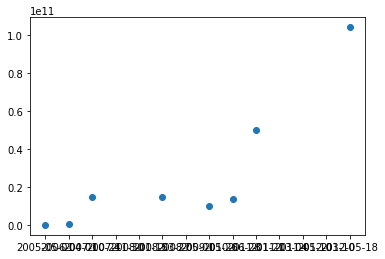

In [ ]:
plt.scatter(timeline[timeline['org_uuid']==company_id]['date'],
            timeline[timeline['org_uuid']==company_id]['valuation'])

In [ ]:
def is_succeeding(idx):
    """
    Assumes dataset is sorted
    """
    if idx == 0:
        return False
    
    last_event = timeline.loc[idx-1]
    curr_event = timeline.loc[idx]
    
    if last_event['org_uuid'] != curr_event['org_uuid']:
        return False
    elif np.isnan(curr_event['valuation']):
        timeline.at[idx, 'valuation'] = deepcopy(timeline.loc[idx]['valuation'])
        return False
    elif curr_event['valuation'] > last_event['valuation']:
        return True
    else:
        # TODO any other cases?
        return False

In [ ]:
timeline['is_succeeding'] = pd.Series(timeline.apply(lambda row: is_succeeding(row.name), axis=1))
timeline.head()

,org_uuid,date,valuation,event,is_succeeding
0,00000aa4-ba42-9b68-a9c3-040c9f3bf9b9,2013-02-25,NaN,lbo,False
1,00000aa4-ba42-9b68-a9c3-040c9f3bf9b9,2017-05-12,NaN,acquisition,False
2,00000aa4-ba42-9b68-a9c3-040c9f3bf9b9,2017-07-17,NaN,Venture Round,False
3,000014da-0c46-b9cb-0941-3a93c027b119,2016-11-01,NaN,Pre Seed Round,False
4,000014da-0c46-b9cb-0941-3a93c027b119,2017-01-01,NaN,Grant,False


In [ ]:
timeline[timeline['org_uuid']==company_id]

,org_uuid,date,valuation,event,is_succeeding
410797,df662812-7f97-0b43-9d3e-12f64f504fbb,2004-09-01,NaN,Angel Round,False
410798,df662812-7f97-0b43-9d3e-12f64f504fbb,2005-05-01,9.800000e+07,Series A,False
410799,df662812-7f97-0b43-9d3e-12f64f504fbb,2006-04-01,5.025000e+08,Series B,True
410800,df662812-7f97-0b43-9d3e-12f64f504fbb,2007-10-24,1.500000e+10,Series C,True
410801,df662812-7f97-0b43-9d3e-12f64f504fbb,2007-11-30,NaN,Series C,False
410802,df662812-7f97-0b43-9d3e-12f64f504fbb,2008-01-15,NaN,Series C,False
410803,df662812-7f97-0b43-9d3e-12f64f504fbb,2008-03-27,1.482000e+10,Series C,False
410804,df662812-7f97-0b43-9d3e-12f64f504fbb,2008-05-01,NaN,Debt Financing,False
410805,df662812-7f97-0b43-9d3e-12f64f504fbb,2009-05-26,1.000000e+10,Series D,False
410806,df662812-7f97-0b43-9d3e-12f64f504fbb,2010-06-28,1.392000e+10,Secondary Market,True
